## Stock Market Analysis

1.) What was the change in price of the stock over time?   
2.) What was the daily return of the stock on average?    
3.) What was the moving average of the various stocks?    
4.) What was the correlation between different stocks' closing prices?   
5.) What was the correlation between different stocks' daily returns?    
6.) How much value do we put at risk by investing in a particular stock?    
7.) How can we attempt to predict future stock behavior?
    

In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as pdr

# For time stamps
from datetime import datetime

# For division
from __future__ import division
import yfinance as yf


### Basic Analysis of Stock Information

In [6]:
tech_list=["AAPL","GOOG","MSFT","AMZN"]

In [7]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [8]:
#importing finance data using a for loop

for stock in tech_list:
    globals()[stock] = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
#Stats of stocks

AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,149.719243,151.775259,147.806893,149.843625,149.393610,8.166153e+07
std,11.449474,11.315567,11.449917,11.362153,11.242165,2.377704e+07
min,126.010002,127.769997,124.169998,125.019997,124.829399,3.519590e+07
25%,142.110001,143.854996,139.949997,142.464996,141.973427,6.655525e+07
50%,148.869995,150.919998,147.240005,149.350006,148.910004,7.646840e+07
75%,156.275002,158.154999,154.164993,156.779999,155.852943,8.949255e+07
max,178.550003,179.610001,176.699997,178.440002,177.365555,1.826020e+08


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-03-30 to 2023-03-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<AxesSubplot:xlabel='Date'>

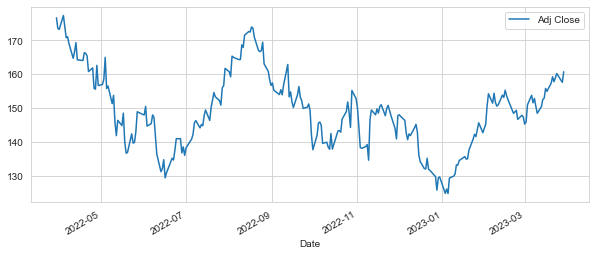

In [11]:
#Plotting adjusted closing prices of stock past year

AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

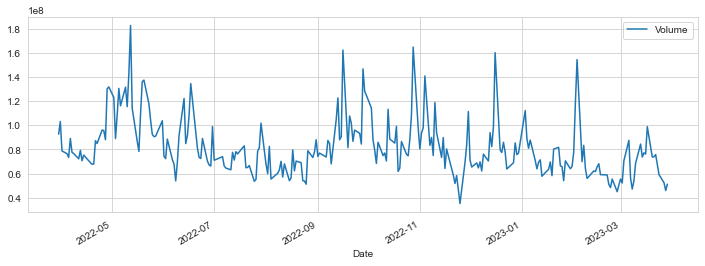

In [12]:
#Plotting total volume of stock past year

AAPL['Volume'].plot(legend=True,figsize=(12,4))

In [13]:
#Moving Averages

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = pd.Series(AAPL['Adj Close']).rolling(window=ma).mean()

AAPL   

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2022-03-30,178.550003,179.610001,176.699997,177.770004,176.699615,92633200,NaN,NaN,NaN
2022-03-31,177.839996,178.029999,174.399994,174.610001,173.558640,103049300,NaN,NaN,NaN
2022-04-01,174.029999,174.880005,171.940002,174.309998,173.260422,78751300,NaN,NaN,NaN
2022-04-04,174.570007,178.490005,174.440002,178.440002,177.365555,76468400,NaN,NaN,NaN
2022-04-05,177.500000,178.300003,174.419998,175.059998,174.005905,73401800,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-03-23,158.830002,161.550003,157.679993,158.929993,158.929993,67622100,154.884000,152.101000,148.248469
2023-03-24,158.860001,160.339996,157.850006,160.250000,160.250000,59196500,156.059000,152.778000,148.787739
2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300,156.839999,153.296000,149.289207


<AxesSubplot:xlabel='Date'>

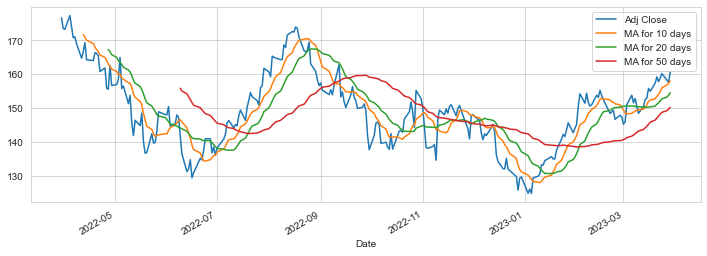

In [14]:
#Plotting moving averages

AAPL[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False,figsize=(12,4))

### Daily Return Analysis

In [15]:
#Finding percent change of Adjusted Closing price for each day

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [16]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2022-03-30,178.550003,179.610001,176.699997,177.770004,176.699615,92633200,NaN,NaN,NaN,NaN
2022-03-31,177.839996,178.029999,174.399994,174.610001,173.558640,103049300,NaN,NaN,NaN,-0.017776
2022-04-01,174.029999,174.880005,171.940002,174.309998,173.260422,78751300,NaN,NaN,NaN,-0.001718
2022-04-04,174.570007,178.490005,174.440002,178.440002,177.365555,76468400,NaN,NaN,NaN,0.023693
2022-04-05,177.500000,178.300003,174.419998,175.059998,174.005905,73401800,NaN,NaN,NaN,-0.018942


<AxesSubplot:xlabel='Date'>

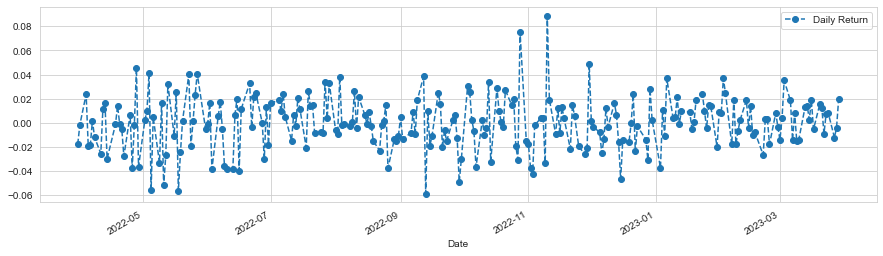

In [17]:
#Plotting Percent Change

AAPL['Daily Return'].plot(figsize=(15,4),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

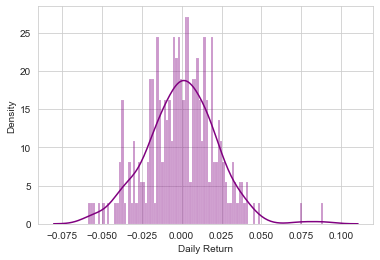

In [18]:
#Using seaborn to plot histogram and KDE

#distplot is deprecated so closest way to replicate a distplot using histplot is following syntax

sns.histplot(
    AAPL['Daily Return'], kde=True,
    stat="density", kde_kws=dict(cut=3),
    bins=100,
    alpha=.4, edgecolor=(1, 1, 1, .4),
    color='purple',
)

C:\Users\mahad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

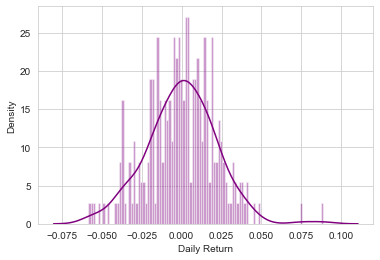

In [19]:
#Deprecated

sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

<AxesSubplot:>

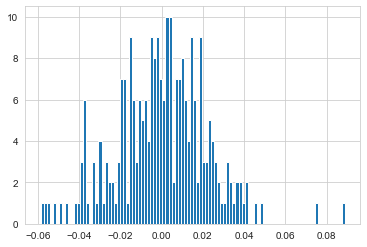

In [20]:
#Using Pandas to plot histogram
AAPL['Daily Return'].hist(bins=100)

### Analyzing the returns of all the stocks in our list

In [21]:
closing_df = yf.download(tech_list,start,end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [22]:
closing_df

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-03-30,176.699615,166.300995,142.644501,310.810852
2022-03-31,173.558640,162.997498,139.649506,305.314758
2022-04-01,173.260422,163.559998,140.699997,306.414001
2022-04-04,177.365555,168.346497,143.642502,311.910095
2022-04-05,174.005905,164.054993,141.063004,307.859772
...,...,...,...,...
2023-03-23,158.929993,98.709999,106.260002,277.660004
2023-03-24,160.250000,98.129997,106.059998,280.570007
2023-03-27,158.279999,98.040001,103.059998,276.380005


In [23]:
tech_rets = closing_df.pct_change()

In [24]:
tech_rets

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-03-30,NaN,NaN,NaN,NaN
2022-03-31,-0.017776,-0.019865,-0.020996,-0.017683
2022-04-01,-0.001718,0.003451,0.007522,0.003600
2022-04-04,0.023693,0.029264,0.020913,0.017937
2022-04-05,-0.018942,-0.025492,-0.017958,-0.012986
...,...,...,...,...
2023-03-23,0.006969,0.000101,0.019574,0.019722
2023-03-24,0.008306,-0.005876,-0.001882,0.010480
2023-03-27,-0.012293,-0.000917,-0.028286,-0.014934


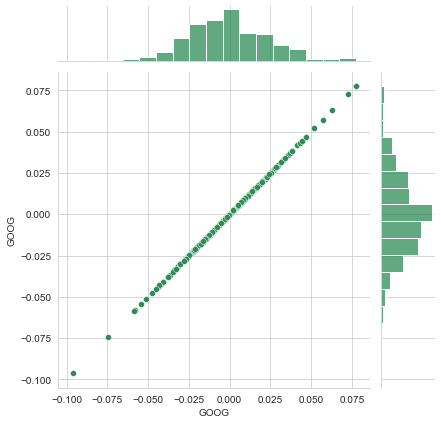

In [25]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='seagreen')

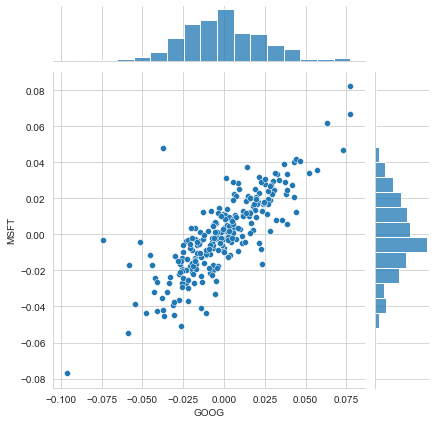

In [26]:
# We'll use jointplot to compare the daily returns of Google and Microsoft

sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter')

In [27]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-03-30,NaN,NaN,NaN,NaN
2022-03-31,-0.017776,-0.019865,-0.020996,-0.017683
2022-04-01,-0.001718,0.003451,0.007522,0.003600
2022-04-04,0.023693,0.029264,0.020913,0.017937
2022-04-05,-0.018942,-0.025492,-0.017958,-0.012986


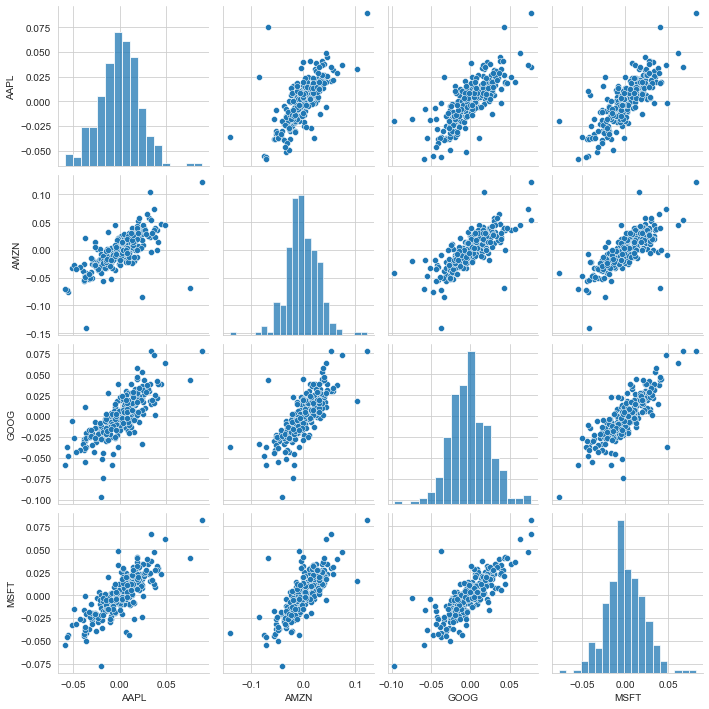

In [28]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons

sns.pairplot(tech_rets.dropna())

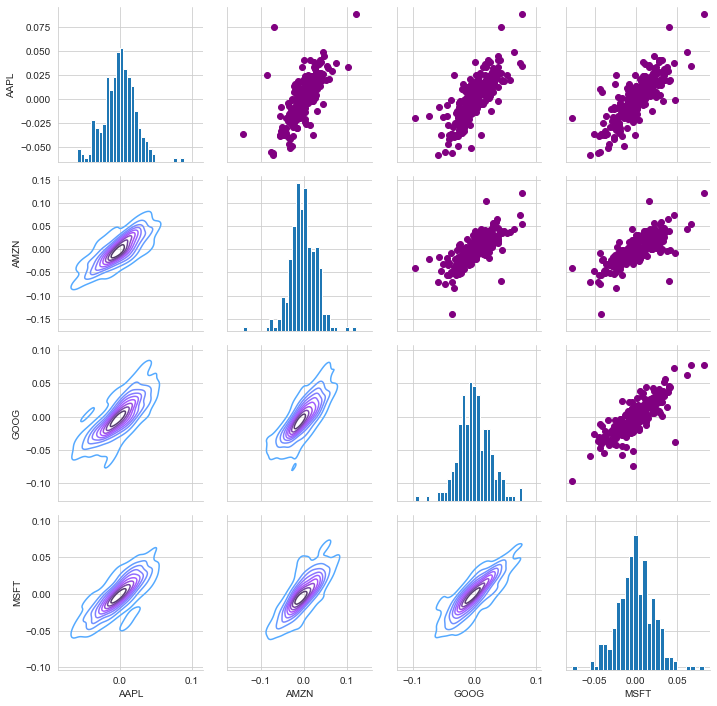

In [29]:
#Setting up our figure manually
#Plotting for percent change in closing prices

returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

<b>Nearly all of them seem to be correlated in scatter plots

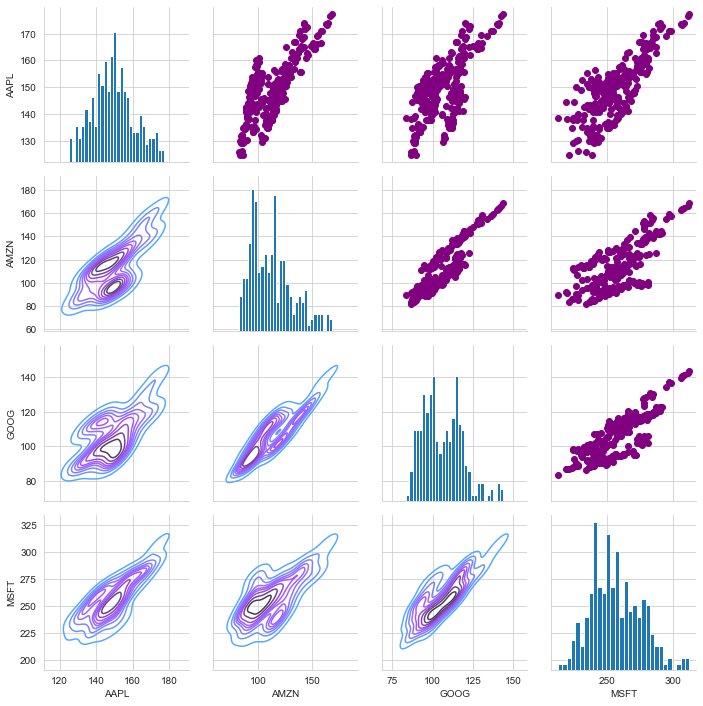

In [30]:
# Plotting For Closing Prices

returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

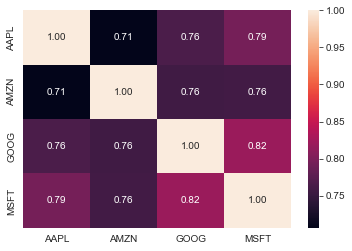

In [31]:
#Correlation plot

tech_rets_corr= tech_rets.dropna().corr()
sns.heatmap(tech_rets_corr, annot=True, fmt='.2f')
plt.show()

#### OR (different and simple syntax)

<AxesSubplot:>

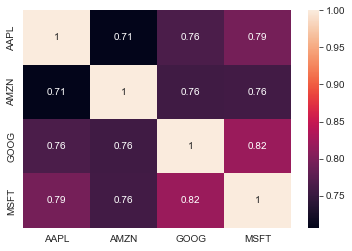

In [32]:
sns.heatmap(tech_rets.dropna().corr(),annot=True)

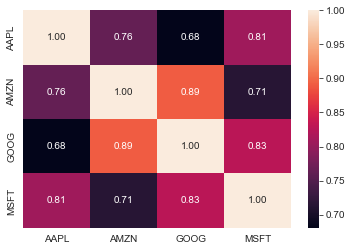

In [33]:
closing_df_corr= closing_df.corr()
sns.heatmap(closing_df_corr, annot=True, fmt='.2f')
plt.show()

#### OR(different and simple syntax)

<AxesSubplot:>

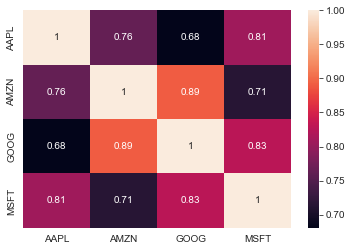

In [34]:
sns.heatmap(closing_df.dropna().corr(),annot=True)

<b>Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology companies are positively correlated.

### Risk Analysis

<b>There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

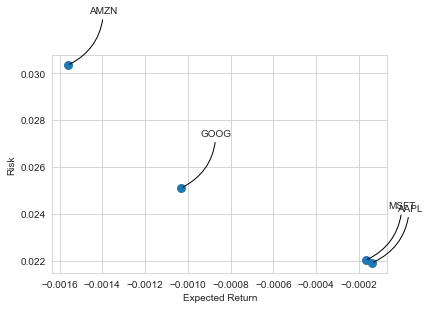

In [35]:
rets = tech_rets.dropna()

area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', color='black', connectionstyle = 'arc3,rad=-0.3'))

#### Value at Risk
We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval.

#### Value at risk using the "bootstrap" method

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

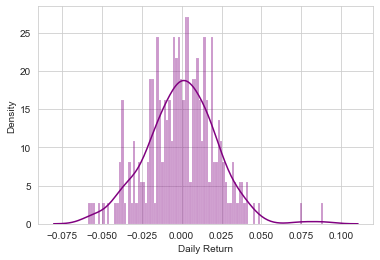

In [36]:
sns.histplot(
    AAPL['Daily Return'].dropna(), kde=True,
    stat="density", kde_kws=dict(cut=3),
    bins=100,
    alpha=.4, edgecolor=(1, 1, 1, .4),
    color='purple',
)

In [37]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-03-31,-0.017776,-0.019865,-0.020996,-0.017683
2022-04-01,-0.001718,0.003451,0.007522,0.003600
2022-04-04,0.023693,0.029264,0.020913,0.017937
2022-04-05,-0.018942,-0.025492,-0.017958,-0.012986
2022-04-06,-0.018451,-0.032300,-0.027555,-0.036606


In [39]:
rets['AAPL'].quantile(0.05)

-0.03737023727081601

This means that with 95% confidence, your worst daily loss would not exceed 3% or simply 95% of time you will daily suffer 3%  loss

#### Value at Risk using the Monte Carlo method

In [40]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [41]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale= sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
        
    return price    

In [42]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-30,142.869995,143.480499,142.167999,142.644501,142.644501,21046000
2022-03-31,142.448502,142.644501,139.619003,139.649506,139.649506,29516000
2022-04-01,140.009995,140.949997,138.796997,140.699997,140.699997,23480000
2022-04-04,140.824493,144.043747,140.824493,143.642502,143.642502,19076000
2022-04-05,143.399506,143.589996,140.943497,141.063004,141.063004,19256000


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

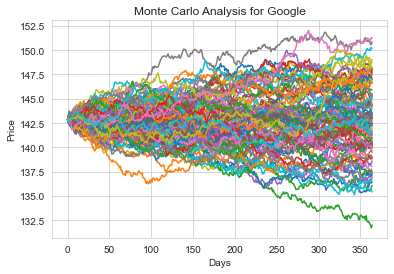

In [43]:
start_price = 142.869995

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [44]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

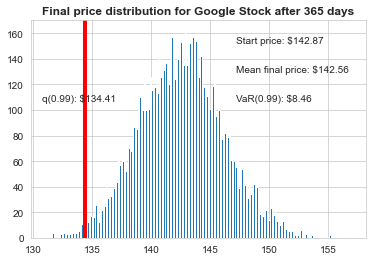

In [45]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

This shows that 99% of time when you run Monte Carlo Simulation on this Google stock the value at risk will be $8.46

#### Different Algo on Monte Carlo

In [48]:
days = 365

dt = 1/days

m = rets.mean()['MSFT']

sig = rets.std()['MSFT']

In [49]:
def stock_monte_carlo_test(start_price, days, m, sig):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=0, scale=sig)
        
        drift[x] = m
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
        
    return price    

In [50]:
MSFT.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-30,313.760010,315.950012,311.579987,313.859985,310.810852,28163600
2022-03-31,313.899994,315.140015,307.890015,308.309998,305.314758,33422100
2022-04-01,309.369995,310.130005,305.540009,309.420013,306.414001,27110500
2022-04-04,310.089996,315.109985,309.709991,314.970001,311.910065,24289600
2022-04-05,313.269989,314.869995,309.869995,310.880005,307.859833,23156700


Text(0.5, 1.0, 'Monte Carlo Analysis for Microsoft')

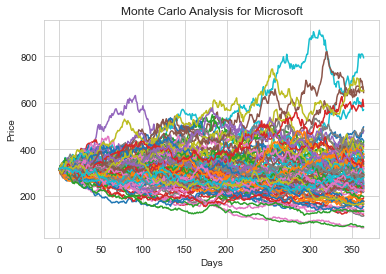

In [51]:
start_price = 313.760010

for run in range(100):
    plt.plot(stock_monte_carlo_test(start_price,days,m,sig))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Microsoft')

In [52]:
days = 365

dt = 1/days

m = rets.mean()['GOOG']

sig = rets.std()['GOOG']

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

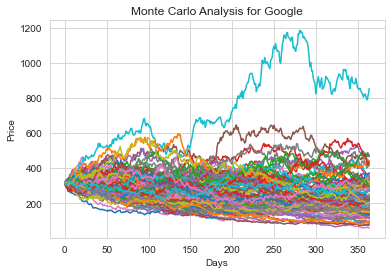

In [53]:
start_price = 313.760010

for run in range(100):
    plt.plot(stock_monte_carlo_test(start_price,days,m,sig))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')